In [45]:
import rasterio as rio
import numpy as np

In [46]:
import pandas as pd
import skimage as ski
import matplotlib.pyplot as plt
from tqdm import tqdm

In [47]:
summary_csv_df = pd.read_csv("/data/spacenet/AOI_1_Rio/summarydata/AOI_1_RIO_polygons_solution_3band.csv")

In [48]:
summary_csv_df.head()

,ImageId,BuildingId,PolygonWKT_Pix,PolygonWKT_Geo
0,AOI_1_RIO_img5792,1,POLYGON ((408.210510077716208 39.5679995656149...,POLYGON ((-43.541791399999966 -22.876368899999...
1,AOI_1_RIO_img5792,2,POLYGON ((389.833864435032297 42.6174620222885...,POLYGON ((-43.541873799999962 -22.876382599999...
2,AOI_1_RIO_img5792,3,POLYGON ((242.119589264420313 -0.0000059554636...,POLYGON ((-43.542536143743767 -22.876191136973...
3,AOI_1_RIO_img5792,4,POLYGON ((311.733120444117787 216.147456877115...,"POLYGON ((-43.542224 -22.8771622 0,-43.5421641..."
4,AOI_1_RIO_img5792,5,POLYGON ((350.582776650603819 112.220886068182...,POLYGON ((-43.542049799999972 -22.876695299999...


In [152]:
tiff = '/data/spacenet/AOI_1_Rio/3band/'

#Only search unique image IDs to save time
image_ids_arr = summary_csv_df['ImageId'].unique()

image_lookup_dict = {}

filenames = os.listdir(tiff)

for image_id in tqdm(image_ids_arr):
    #Open TIFF to get size
    file_flag = False

    for file in filenames:
        if file.find(image_id + '.'):
            raster = rio.open(os.path.join(tiff, file))
            tiff_h, tiff_w = raster.height, raster.width
            file_flag = True
            raster.close()
            break
    if file_flag:
        image_lookup_dict[image_id] = ((tiff_h, tiff_w))
    else:
        image_lookup_dict[image_id] = ((0, 0))

100%|██████████| 6940/6940 [00:07<00:00, 970.32it/s]


In [153]:
image_polygons_dict = {}
for image_id in tqdm(image_ids_arr):
    curr_id_polys = summary_csv_df[summary_csv_df['ImageId'] == image_id]
    image_polygons_dict[image_id] = []
    for idx, row in curr_id_polys.iterrows():
        image_polygons_dict[image_id] += [row['PolygonWKT_Pix']]



100%|██████████| 6940/6940 [01:44<00:00, 66.44it/s]


In [105]:
for image_id in tqdm(image_ids_arr[0:2000]):
    image_dim = image_lookup_dict[row['ImageId']]
    numbers = re.compile(r'\d+(?:\.\d+)?')
    if image_dim == (0, 0):
        #No matching tiff file
        break
    
    curr_id_polys = image_polygons_dict[image_id]
    masked_image = np.zeros(image_dim)
    try:
        for poly in curr_id_polys:
            if poly.find('EMPTY') != -1:
                polygon_arr = np.empty(image_dim)
            else:
                polygon_arr = np.array(list(numbers.findall(i) for i in test_poly.split("((")[1].split("))")[0].split(','))).astype(float)
            y_arr = polygon_arr[:,0:1].flatten()
            x_arr = polygon_arr[:,1:2].flatten()
            
            rr, cc = ski.draw.polygon(x_arr, y_arr, image_dim)
            masked_image[rr,cc] = 1

        masked_image = masked_image.astype(np.uint8)
        ski.io.imsave(os.path.join(args.output, image_id + '_mask.jpg'), masked_image, check_contrast=False)
    except:
        print('Error with: ', image_id)
        print(poly)
        print(polygon_arr)
        break


  0%|          | 0/1000 [00:00<?, ?it/s]

Error with:  AOI_1_RIO_img5792
POLYGON ((125.468867521387196 379.883557698733455 0,104.46061486105684 381.975889603958876 0,105.731814857346237 401.407865672472269 0,128.747225423234966 398.67002712224712 0,125.468867521387196 379.883557698733455 0))
[[244.73655449 189.37187717   0.        ]
 [226.59012613 201.90353553   0.        ]
 [233.63468554 212.05351104   0.        ]
 [220.10288946 221.4021727    0.        ]
 [238.62829727 248.15715203   0.        ]
 [270.28422882 226.276832     0.        ]
 [244.73655449 189.37187717   0.        ]
 [249.55182294 218.06336497   0.        ]
 [239.36396329 224.83001531   0.        ]
 [234.08054373 216.92817034   0.        ]
 [244.26840339 210.13926129   0.        ]
 [249.55182294 218.06336497   0.        ]]


In [166]:
#Testing cell for troubleshooting particular images
image_id = 'AOI_1_RIO_img5125'
curr_id_polys = image_polygons_dict[image_id]
image_dim = image_lookup_arr[image_id]
masked_arr = np.zeros(image_dim)
#try:
for poly in curr_id_polys:
   if poly.find('EMPTY') != -1:
      polygon_arr = np.empty(image_dim)
   else:
      polygon_arr = np.array(list(numbers.findall(i) for i in poly.split("((")[1].split("))")[0].split(','))).astype(float)
   y_arr = polygon_arr[:,0:1].flatten()
   x_arr = polygon_arr[:,1:2].flatten()
            
   rr, cc = ski.draw.polygon(x_arr, y_arr, image_dim)
   masked_arr[rr,cc] = 1

   masked_arr = masked_arr.astype(np.uint8)
   
   np.save(os.path.join(image_id + '_mask.npy'), masked_arr)
   #ski.io.imsave(os.path.join(image_id + '_mask.jpg'), masked_image, check_contrast=False)
#except:
#   print('Error with: ', image_id)

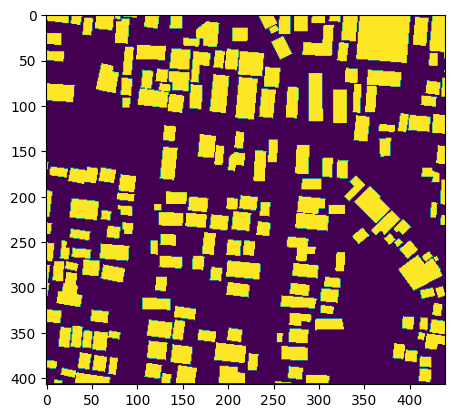

In [167]:
plt.imshow(masked_arr)

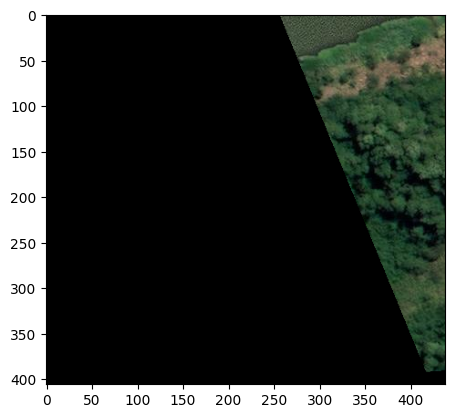

<AxesSubplot: >

In [84]:
test_tiff = "/data/spacenet/AOI_1_Rio/3band/3band_AOI_1_RIO_img1.tif"
raster = rio.open(test_tiff)
#raster.read().shape
from rasterio import plot
plot.show(raster.read().astype(np.uint8))

In [168]:
mask = np.load('AOI_1_RIO_img5125_mask.npy')
np.unique(mask)

array([0, 1], dtype=uint8)

In [172]:
from scipy.ndimage.morphology import distance_transform_edt

mask_with_labels = ski.measure.label(mask)
no_label_parts = mask_with_labels == 0
label_ids = np.unique(mask_with_labels)[1:]
w0 = 10
sigma = 5
wc = None
if len(label_ids) > 1:
    distances = np.zeros((mask.shape[0], mask.shape[1], len(label_ids)))
    for i, label_id in enumerate(label_ids):
        distances[:, :, i] = distance_transform_edt(mask_with_labels != label_id)
    distances = np.sort(distances, axis=2)
    d1 = distances[:, :, 0]
    d2 = distances[:, :, 1]
    weight_map = w0 * np.exp(-1/2 * ((d1+d2)/sigma) ** 2) * no_label_parts
    weight_map = weight_map + np.ones_like(weight_map)
        
    if wc:
        class_weights = np.zeros_like(mask)
        for k, v in wc.items():
            class_weights[mask == k] = v
            weight_map = weight_map + class_weights
                
else:
    weight_map = np.zeros_like(mask)


/tmp/ipykernel_705337/2146465074.py:1: DeprecationWarning: Please use `distance_transform_edt` from the `scipy.ndimage` namespace, the `scipy.ndimage.morphology` namespace is deprecated.
  from scipy.ndimage.morphology import distance_transform_edt


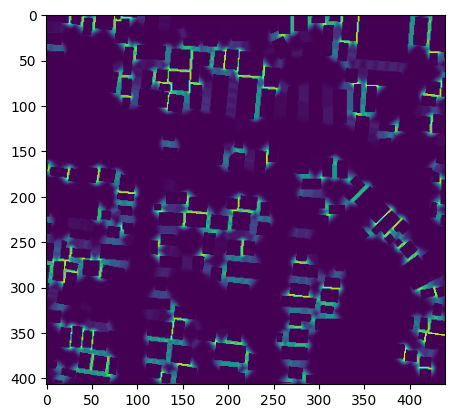

In [173]:
plt.imshow(weight_map)

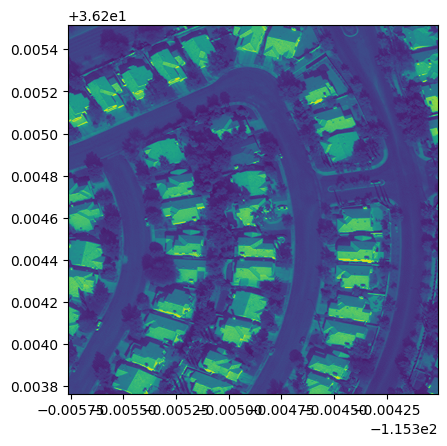

3

In [179]:
pan = rio.open('/data/spacenet/AOI_2_Vegas/AOI_2_Vegas_Test_public/RGB-PanSharpen/RGB-PanSharpen_AOI_2_Vegas_img100.tif')
rio.plot.show(pan)
pan.count